<a href="https://colab.research.google.com/github/Noufeine/conway_99_graph/blob/main/1-aleatoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

le meilleur graphe trouvé a un score de :  100.0


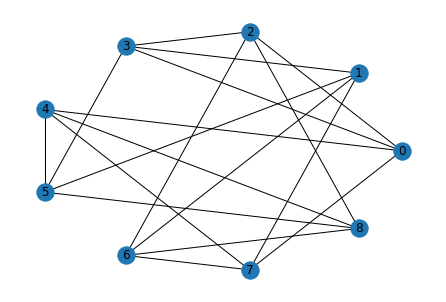

In [2]:
# import libraries
import numpy as np
import networkx as nx
import random
from networkx.drawing.nx_pydot import write_dot
import pandas as pd 
import matplotlib.pyplot as plt 
import os, psutil
process = psutil.Process(os.getpid())
#renvoies tous les voisins d'un sommet excepté sauf
def tous_les_voisins(matrice, sommet, sauf):
  tous_voisins = []
  for i in range(len(matrice[sommet])):
    if(matrice[sommet][i] == 1 and i!=sauf):
      tous_voisins.append(i)
  return tous_voisins

#renvoie le degree d'un sommet
def get_degree(matrice, sommet):
  degree = 0
  for i in range(len(matrice[sommet])):
    degree+=matrice[sommet][i]
  return degree

#renvoie True si sommet_1 et sommet_2 sont voisins, False sinon
def ont_un_voisin_commun(matrice, sommet_1, sommet_2):
  ont_un_voisin_commun = False
  i = 0
  while( i < len(matrice) and ont_un_voisin_commun == False):
    if( matrice[sommet_1][i] == 1 and matrice[sommet_2][i] == 1 ):
      ont_un_voisin_commun = True
    i+=1
  return ont_un_voisin_commun

#renvoie un sommet aleatoire avec le plus petit degre
def get_sommet_plus_petit_degree(matrice):
  petit_degree = 9999999
  liste_sommets = []
  for i in range(len(matrice)):
    current_degree = 0
    for j in range(len(matrice[i])):
      current_degree+=matrice[i][j]
    if( petit_degree > current_degree ):
      petit_degree = current_degree
      liste_sommets = []
      liste_sommets.append(i)
    elif( petit_degree ==  current_degree ):
      liste_sommets.append(i)
  #renvoie un sommet au hasard avec le plus petit dégre
  return random.sample(liste_sommets, 1)[0]

#renvoie tous les somments non adjacents d'un sommet
def tous_les_sommets_non_adjacents(matrice, sommet):
  sommets_non_adjacents = []
  for i in range(len(matrice[sommet])):
    if(matrice[sommet][i] == 0 and i != sommet):
      sommets_non_adjacents.append(i)
  return sommets_non_adjacents

#revoie 2 sommets aléatoire qui doivent etre non adjacents à remplir le 2ème sommet doit avoir le plus grand dégree
def get_sommets_non_adjacents_a_remplir(matrice, pas_lie, degree):
  sommet_petit_degree = get_sommet_plus_petit_degree(matrice)
  #ensuite, on recupère tous les sommets qui ne lui sont pas adjacents et qui de preference ont déjà une relation et qui ont une relation de non adjence avec d'autres.
  sommets_non_adjacents = tous_les_sommets_non_adjacents(matrice, sommet_petit_degree)
  sommet_deja_engage = []
  sommet_pas_engage = []
  petit_degree = 9999999
  grand_degree = -1
  for i in range(len(sommets_non_adjacents)):
    current_degree = 0
    for j in range(len(matrice[sommets_non_adjacents[i]])):
      current_degree+=matrice[sommets_non_adjacents[i]][j]
      #if( pas_lie[sommets_non_adjacents[i]][j] == 1 and sommets_non_adjacents[i] not in sommet_deja_engage ):
        #sommet_deja_engage.append(sommets_non_adjacents[i])
    if( petit_degree > current_degree ):
      petit_degree = current_degree
      sommet_pas_engage = []
      sommet_pas_engage.append(sommets_non_adjacents[i])
    elif( petit_degree == current_degree ) :
      sommet_pas_engage.append(sommets_non_adjacents[i])
    #tester en changeant l'inégalité
    if( grand_degree < current_degree ):
      grand_degree = current_degree
      sommet_deja_engage = []
      sommet_deja_engage.append(sommets_non_adjacents[i])
    elif( grand_degree == current_degree ) :
      sommet_deja_engage.append(sommets_non_adjacents[i])

  if( len(sommet_deja_engage) > 0 ):
    return [random.sample(sommet_deja_engage, 1)[0], sommet_petit_degree]
  elif( len(sommet_pas_engage) ):
    return [random.sample(sommet_pas_engage, 1)[0], sommet_petit_degree]
  return []

"""
def get_sommets_non_adjacents_a_remplir(matrice, pas_lie, degree):
  sommet_petit_degree = get_sommet_plus_petit_degree(matrice)
  #ensuite, on recupère tous les sommets qui ne lui sont pas adjacents et qui de preference ont déjà une relation et qui ont une relation de non adjence avec d'autres.
  sommets_non_adjacents = tous_les_sommets_non_adjacents(matrice, sommet_petit_degree)
  sommet_deja_engage = []
  sommet_pas_engage = []
  petit_degree = 9999999
  for i in range(len(sommets_non_adjacents)):
    current_degree = 0
    for j in range(len(matrice[sommets_non_adjacents[i]])):
      current_degree+=matrice[sommets_non_adjacents[i]][j]
      if( pas_lie[sommets_non_adjacents[i]][j] == 1 and sommets_non_adjacents[i] not in sommet_deja_engage ):
        sommet_deja_engage.append(sommets_non_adjacents[i])
    if( petit_degree > current_degree ):
      petit_degree = current_degree
      sommet_pas_engage = []
      sommet_pas_engage.append(sommets_non_adjacents[i])
    elif( petit_degree == current_degree ) :
      sommet_pas_engage.append(sommets_non_adjacents[i])
  if( len(sommet_deja_engage) > 0 ):
    return [random.sample(sommet_deja_engage, 1)[0], sommet_petit_degree]
  elif( len(sommet_pas_engage) ):
    return [random.sample(sommet_pas_engage, 1)[0], sommet_petit_degree]
  return []
"""

#renvoie le nombre de voisins en commun entre 2 sommets:
def nbr_voisins_en_commun(matrice, sommet_1, sommet_2):
  les_voisins_1 = tous_les_voisins(matrice, sommet_1, sommet_2)
  les_voisins_2 = tous_les_voisins(matrice, sommet_2, sommet_1)
  nbr_voisins = 0
  for i in range( len(les_voisins_1) ):
    if( les_voisins_1[i] in les_voisins_2 ): 
      nbr_voisins+=1
  return nbr_voisins

#renvoie True si toutes les conditions pour tous les sommets on été rempli, 
#avec la variable affiche, on peut afficher la matrice de test : si la matrice n'a que des 1 alors toutes les conditions ont été satisfaite.
def tester(matrice, l, m, affiche):
  resultat = np.zeros((len(matrice), len(matrice)))
  nbr_conditions = 0
  for i in range(len(matrice)):
    for j in range(len(matrice[i])):
      if( matrice[i][j] == 1 and nbr_voisins_en_commun(matrice, i, j) == l ):
        resultat[i][j] = 1
      elif( matrice[i][j] == 0 and nbr_voisins_en_commun(matrice, i, j) == m ):
        resultat[i][j] = 1
      elif( i == j and matrice[i][j] == 0 ):
        resultat[i][j] = 1
      else:
        resultat[i][j] = 0
      nbr_conditions+= resultat[i][j]
  if( affiche == 1 ):
    print(resultat)
  return nbr_conditions

#renvoie true si le graphe est complet, false sinon
def graphe_complet(matrice, degree):
  complet = True
  i = 0
  while(i < len(matrice) and complet == True):
    j = 0
    current_degree = 0
    while(j < len(matrice[i]) and complet == True ):
      current_degree+=matrice[i][j]
      j+=1
    if( current_degree < degree ):
      complet = False
    i+=1
  return complet

#on prends 2 sommets qui ne doivent pas etre adjacents et on rempli leurs arrete correspondant
def remplir_suivant_propriete_2(matrice, pas_lie, degree, l, m):
  sommets_non_adjacents = get_sommets_non_adjacents_a_remplir(matrice, pas_lie, degree)
  #seulement si on arrive à avoir 2 sommets non adjacents
  if( len(sommets_non_adjacents) == 2 ):
    #recupère tous les sommets vosins du premier, sauf le 2ème.
    les_voisins = tous_les_voisins(matrice, sommets_non_adjacents[0], sommets_non_adjacents[1])
    nbr_arete_cree = 0
    voisin_visite = []
    for i in range(len(les_voisins)):
      voisin_visite.append(les_voisins[i])
      """
      print('ont voisin en commun', not ont_un_voisin_commun(matrice, les_voisins[i], sommets_non_adjacents[1]))
      print('la relation', nbr_arete_cree < m)
      print ('degree 1', get_degree(matrice, sommets_non_adjacents[1]) < degree)
      print ('degree 2', get_degree(matrice, les_voisins[i]) < degree)
      """
      #s'il ont un voisin en commun, on ne crée pas sinon on crée.
      if( nbr_voisins_en_commun(matrice, les_voisins[i], sommets_non_adjacents[1]) <= l and nbr_arete_cree < m and get_degree(matrice, sommets_non_adjacents[1]) < degree and get_degree(matrice, les_voisins[i]) < degree ):
      #if( not ont_un_voisin_commun(matrice, les_voisins[i], sommets_non_adjacents[1]) and nbr_arete_cree < m and get_degree(matrice, sommets_non_adjacents[1]) < degree and get_degree(matrice, les_voisins[i]) < degree ):
        matrice[les_voisins[i]][sommets_non_adjacents[1]] = 1
        matrice[sommets_non_adjacents[1]][les_voisins[i]] = 1
        nbr_arete_cree+=1
    if( nbr_arete_cree < m ):
      sommet_possible = []
      for i in range (len(matrice)):
        if( i not in voisin_visite and i not in sommets_non_adjacents ):
          sommet_possible.append(i)
      for i in range( len(sommet_possible) ):
        if( get_degree(matrice, sommets_non_adjacents[0]) < degree and get_degree(matrice, sommet_possible[i]) < degree  and get_degree(matrice, sommets_non_adjacents[1]) < degree and  nbr_arete_cree < m and not ont_un_voisin_commun(matrice, sommet_possible[i], sommets_non_adjacents[1]) and not ont_un_voisin_commun(matrice, sommet_possible[i], sommets_non_adjacents[0]) ):
          matrice[sommet_possible[i]][sommets_non_adjacents[0]] = 1
          matrice[sommets_non_adjacents[0]][sommet_possible[i]] = 1
          matrice[sommet_possible[i]][sommets_non_adjacents[1]] = 1
          matrice[sommets_non_adjacents[1]][sommet_possible[i]] = 1
          nbr_arete_cree+=1
    if( nbr_arete_cree == m ):
      pas_lie[sommets_non_adjacents[1]][sommets_non_adjacents[0]] = 1
      pas_lie[sommets_non_adjacents[0]][sommets_non_adjacents[1]] = 1


#on regarde toutes les sommets adjacents, et on s'assure qu'ils ont exactement un unique voisin en commun
def remplir_suivant_propriete_1(matrice, pas_lie, degree, l, m):
  #on recupère d'abord tous les sommets qui ont au moins dégrere (un arret)
  all_sommet = []
  for i in range(len(matrice)):
    current_degree = 0
    for j in range(len(matrice[i])):
      current_degree+=matrice[i][j]
    if( current_degree > 0 ):
      all_sommet.append(i)
  #on parcours les sommets:
  for i in range(len(all_sommet)):
    for j in range(len(matrice[all_sommet[i]])):
      #s'il ont une relation et qu'ils n'ont pas encore de voisins en communs
      if( matrice[all_sommet[i]][j] == 1 and not ont_un_voisin_commun(matrice, all_sommet[i], j) ) :
        #recupère tous les voisins de j sauf i
        nbr_arete_cree = 0
        les_voisins = tous_les_voisins(matrice, j, all_sommet[i])
        for k in range(len(les_voisins)):
          if( get_degree(matrice, all_sommet[i]) < degree and get_degree(matrice, les_voisins[k]) < degree and nbr_arete_cree < l and pas_lie[all_sommet[i]][les_voisins[k]] == 0 and not ont_un_voisin_commun(matrice, all_sommet[i], les_voisins[k]) ):
            matrice[all_sommet[i]][les_voisins[k]] = 1
            matrice[les_voisins[k]][all_sommet[i]] = 1
            nbr_arete_cree+=1
        #on parcour ce qui ne sont pas voisins:
        for k in range(len(matrice)):
          if( nbr_arete_cree < l and k not in les_voisins and not ont_un_voisin_commun(matrice, all_sommet[i], k) and not ont_un_voisin_commun(matrice, j, k) and pas_lie[all_sommet[i]][k] == 0 and pas_lie[j][k] == 0 ):
              if( get_degree(matrice, all_sommet[i]) < degree and get_degree(matrice, k) < degree and get_degree(matrice, j) < degree ):
                matrice[all_sommet[i]][k] = 1
                matrice[k][all_sommet[i]] = 1
                
                matrice[j][k] = 1
                matrice[k][j] = 1

                nbr_arete_cree+=1

def progamme_principal(order, degree, l, m, type_retour):
  #matrice qui contiendra les résultat
  matrice = np.zeros((order,order))
  #matrice qui contiendra les somments qui ne doivent JAMAIS se lier
  pas_lie = np.zeros((order,order))
  i = 0
  meilleur_score = 0
  meilleur_matrice = matrice
  while( tester(matrice, l, m, 0) < (len(matrice)*len(matrice)) and i < 1000):
    j = 0
    #matrice qui contiendra les résultat
    matrice = np.zeros((order,order))
    #matrice qui contiendra les somments qui ne doivent JAMAIS se lier
    pas_lie = np.zeros((order,order))
    #Tant que les dégree ne sont pas tous remplie
    while( not graphe_complet(matrice, degree) and j < 1000):
      #on rempli suivant la propriété 2:
      remplir_suivant_propriete_2(matrice, pas_lie, degree, l, m)
      #Puis, on rempli suivant la propriété 1:
      remplir_suivant_propriete_1(matrice, pas_lie, degree, l, m)
      j+=1
    current_score = tester(matrice, l, m, 0)
    if( current_score > meilleur_score ):
      meilleur_score = current_score
      meilleur_matrice = matrice
    """
    if( i%20 == 0 ):
      print(process.memory_info().rss) 
    """
    i+=1
  if( meilleur_score == (len(matrice)*len(matrice)) ):
    if( type_retour == 'nbr_iteration' ):
      return i
    else:
      return [meilleur_score, meilleur_matrice]
  else:
    return 'KO'

#remplie une feuille excel pour remplir le nombre d'itération pour générer le graphe avec les paramètres envoyé.
def get_data_nbr_iteration(file_name, it, order, degree, l, m):
  for i in range(it):
    type_retour = 'nbr_iteration'
    nbr_it = progamme_principal(order, degree, l, m, type_retour)
    if( nbr_it != 'KO'):
      print(nbr_it)


# Set params
order = 9
degree = 4
# Assumed params
l = 1
m = 2

#Remplissage d'une feuille excel avec toutes les stats.
#get_data_nbr_iteration("fichier_nbr_iteration", 10, order, degree, l, m)



#AFFICHAGE DU GRAPHE
programme = progamme_principal(order, degree, l, m, '')
meilleur_matrice = programme[1]
meilleur_score = programme[0]
#on affiche la matrice de teste, pour voir si tout a été bien rempli:
#tester(meilleur_matrice, l, m, 1)
print('le meilleur graphe trouvé a un score de : ', meilleur_score/(len(meilleur_matrice)*len(meilleur_matrice))*100)
#on trace:
G = nx.from_numpy_matrix(meilleur_matrice) 
nx.draw_circular(G, with_labels=True)
